**Veri Seti Hikayesi**

4 veri setimiz var:

* products: Ürün id'leri ile ürün ad ve fiyatların tutulduğu tablodur.
* customers: Müşteri id'leri ile müşteri ad soyad'ların tutulduğu tablodur.
* employees: Çalışan id'lerin tutulduğu tablodur.
* sales: Yapılan satışların kaç adet olduğu, hangi müşterinin aldığı ve hangi çalışan tarafından alındığını gösteren tablodur.


Veri setlerini okutalım

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("customers.csv", engine="python" )
employees = pd.read_csv("employees.csv", engine="python" )
products = pd.read_csv("products.csv", engine="python" )
sales = pd.read_csv("sales.csv", engine="python" )



In [34]:
def check_df(dataframe, head=5):

    # boyut bilgisi
    print("############################ Shape #############################")
    print(dataframe.shape)

    # tip bilgisi
    print("############################ Types #################################")
    print(dataframe.dtypes)

    #Baştan gözlemleyelim
    print("########################## Head ############################")
    print(dataframe.head(head))

    #Sondan gözlemleyelim
    print("########################### Tail ###########################")
    print(dataframe.tail(head))

    #Veri setinde herhangi bir eksik değer var mı bakalım
    print("########################## NA #########################")
    print(dataframe.isnull().sum())

    #Tekrar etmiş veri var mı bakalım
    print("########################## Duplicate Data #######################")
    print(dataframe.duplicated().sum())




In [35]:

print(check_df(sales))





############################ Shape #############################
(1388921, 5)
############################ Types #################################
SalesID          int64
SalesPersonID    int64
CustomerID       int64
ProductID        int64
Quantity         int64
dtype: object
########################## Head ############################
   SalesID  SalesPersonID  CustomerID  ProductID  Quantity
0        4              1        4182        437       437
1        9              1           1          1        10
2       20              1        4182        437       437
3       25              1           1          1        26
4       33              1       13482         26       530
########################### Tail ###########################
         SalesID  SalesPersonID  CustomerID  ProductID  Quantity
1388916  6737591              4       11120        411       916
1388917  6737592              4       11120        411       916
1388918  6737593              4       11120        41

In [36]:
print(check_df(customers))


############################ Shape #############################
(275, 4)
############################ Types #################################
CustomerID        int64
FirstName        object
MiddleInitial    object
LastName         object
dtype: object
########################## Head ############################
   CustomerID FirstName MiddleInitial   LastName
0           1     Aaron           NaN  Alexander
1           5     Aaron           NaN    Coleman
2           8     Aaron           NaN     Flores
3          21     Aaron           NaN     Powell
4          24     Aaron           NaN       Shan
########################### Tail ###########################
     CustomerID FirstName MiddleInitial  LastName
270       19280    Walter             S   Navarro
271       19360     Wendy           NaN      Sanz
272       19440   William             K    Sotelo
273       19520     Wyatt           NaN  Thompson
274       19680    Yvonne           NaN     McKay
########################## NA #

In [37]:
print(check_df(products))


############################ Shape #############################
(267, 3)
############################ Types #################################
ProductID      int64
Name          object
Price        float64
dtype: object
########################## Head ############################
   ProductID                   Name  Price
0          1        Adjustable Race    1.6
1          2           Bearing Ball    0.8
2          3        BB Ball Bearing    2.4
3          4  Headset Ball Bearings    0.0
4          5                  Blade  189.6
########################### Tail ###########################
     ProductID                    Name   Price
262        498  Mountain-500 Black, 52  539.99
263        500       ML Bottom Bracket  101.24
264        501       HL Bottom Bracket  121.49
265        503      Road-750 Black, 48  539.99
266        504      Road-750 Black, 52  539.99
########################## NA #########################
ProductID    0
Name         0
Price        0
dtype: int64
####

In [38]:
print(check_df(employees))

############################ Shape #############################
(5, 1)
############################ Types #################################
EmployeeID    int64
dtype: object
########################## Head ############################
   EmployeeID
0           1
1           2
2           3
3           4
4           5
########################### Tail ###########################
   EmployeeID
0           1
1           2
2           3
3           4
4           5
########################## NA #########################
EmployeeID    0
dtype: int64
########################## Duplicate Data #######################
0
None


Burada customers tablosundaki, ikinci isim baş harf sütununun ayırt edici olup olmadığını kontrol ettim

In [40]:

df = pd.DataFrame(customers, columns = ['FirstName', 'LastName'])
isDuplicate = df[df.duplicated()]
print("Duplicate Rows :" )
isDuplicate


Duplicate Rows :


,FirstName,LastName


Burada aynı isim, soyisimde kişi olmadığını gördüm ve bu yüzden MiddleInitial sütununu kaldırdım

In [41]:
customers.drop('MiddleInitial', axis=1,inplace=True)
customers

,CustomerID,FirstName,LastName
0,1,Aaron,Alexander
1,5,Aaron,Coleman
2,8,Aaron,Flores
3,21,Aaron,Powell
4,24,Aaron,Shan
...,...,...,...
270,19280,Walter,Navarro
271,19360,Wendy,Sanz
272,19440,William,Sotelo
273,19520,Wyatt,Thompson


Fiyatı 0 tl olan ürün var mı eğer varsa satılmışlar mı kontrolü sağladım 

In [45]:
products["Price"].describe()

count     267.000000
mean      474.253165
std       730.858277
min         0.000000
25%        49.990000
50%       196.400000
75%       539.990000
max      3578.270000
Name: Price, dtype: float64

In [43]:

df= products.loc[products['Price'] == 0.0]
df['ProductID'].isin(sales['ProductID']).value_counts()





True    33
Name: ProductID, dtype: int64

Satılan ürünlerin isimleri öğrenmek için iki tabloyu birleştirdim ve ürünlerden ne kadar kazanıldığını görmek için earning adlı yeni bir sütun ekledim

In [46]:
merged = pd.merge( products,sales)
newdf= merged.loc[merged['Price'] != 0.0]
newdf.drop(['ProductID', 'SalesID'], axis=1,inplace=True)
earning = newdf.Price * newdf.Quantity
newdf['Earning'] = earning
print(newdf)




                       Name   Price  SalesPersonID  CustomerID  Quantity  \
0           Adjustable Race    1.60              1           1        10   
1           Adjustable Race    1.60              1           1        26   
2           Adjustable Race    1.60              1           1       179   
3           Adjustable Race    1.60              1           1       195   
4           Adjustable Race    1.60              1           1        11   
...                     ...     ...            ...         ...       ...   
1388916  Road-750 Black, 52  539.99              4        1200       504   
1388917  Road-750 Black, 52  539.99              4        1200       504   
1388918  Road-750 Black, 52  539.99              4        1200       504   
1388919  Road-750 Black, 52  539.99              4        1200       504   
1388920  Road-750 Black, 52  539.99              4        1200       504   

           Earning  
0            16.00  
1            41.60  
2           286.40  
3  

/var/folders/wx/ng4jhgrx501866710srdzt_m0000gn/T/ipykernel_15303/978583391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop(['ProductID', 'SalesID'], axis=1,inplace=True)
/var/folders/wx/ng4jhgrx501866710srdzt_m0000gn/T/ipykernel_15303/978583391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Earning'] = earning


In [122]:
print(newdf.groupby('SalesPersonID')['Earning'].sum().reset_index().sort_values('Earning',ascending=False))

   SalesPersonID       Earning
0              1  1.265402e+11
1              2  8.680831e+10
3              4  5.555479e+10
2              3  3.682692e+10


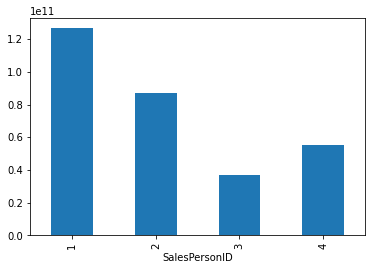

In [63]:
#Çalışanların satışlardan kazandırdığı para
salespersons = newdf.groupby(['SalesPersonID']).sum()
salespersons['Earning'].plot.bar()
plt.show()

In [85]:
#Çalışanların kaç adet satış yaptığı
print(newdf.groupby('SalesPersonID')['Quantity'].count().sort_values(ascending=False))

SalesPersonID
1    462837
2    302683
4    287236
3    246489
Name: Quantity, dtype: int64


/var/folders/wx/ng4jhgrx501866710srdzt_m0000gn/T/ipykernel_15303/3098137187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf["isClothes"] = newdf['Name'].apply(lambda x: 'Clothes' if any(i in x for i in searchFor) else 'NotClothes')


<AxesSubplot: ylabel='Quantity'>

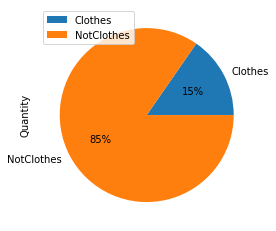

In [86]:
# Bonus: En çok hangi kategoriden ürün satılmış?
searchFor = ['Shorts', 'Gloves', 'Sleeve', 'Tights','Socks']
newdf["isClothes"] = newdf['Name'].apply(lambda x: 'Clothes' if any(i in x for i in searchFor) else 'NotClothes')
newdf


newdf.groupby(['isClothes']).sum().plot(kind='pie', y='Quantity',autopct='%1.0f%%')


In [93]:
#Bonus:en çok ürün satın alan 10 müşteri listesi
customer=newdf[['CustomerID', 'Quantity' ]].drop_duplicates(keep='last').nlargest(10, 'Quantity')
new = customer.loc[customer['Quantity'] >= 1000]
topcustomers = pd.merge(new,customers)
topcustomers

,CustomerID,Quantity,FirstName,LastName
0,2880,1012,Bruce,Torres
1,12640,1011,Lori,Alvarez
2,2640,1010,Brett,Rana
3,12400,1009,Leslie,Ortega
4,2400,1008,Bonnie,Chande
5,11920,1005,Kristine,Alvarez
6,9760,1003,Jésus,Blanco
7,9520,1002,Jeremy,Wright
8,19520,1002,Wyatt,Thompson
9,51,1001,Aaron,Nelson


In [100]:
#çalışanların hangi üründen kaç tane sattığı
newdf['Quantity'] = newdf['Quantity'].astype(str).astype(int)
stat = newdf.groupby(['SalesPersonID','Name'])['Quantity'].sum()
stat

/var/folders/wx/ng4jhgrx501866710srdzt_m0000gn/T/ipykernel_15303/2302069081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Quantity'] = newdf['Quantity'].astype(str).astype(int)


SalesPersonID  Name                   
1              AWC Logo Cap                335048
               Adjustable Race              84393
               All-Purpose Bike Stand     1837473
               Bearing Ball                    24
               Blade                       203010
                                           ...   
4              Touring-1000 Yellow, 50     891480
               Touring-2000 Blue, 54          954
               Touring-3000 Blue, 44      1693445
               Touring-3000 Blue, 50      9212023
               Women's Tights, S              357
Name: Quantity, Length: 358, dtype: int64

In [126]:
#Müşterilerin hangi çalışandan ne kadar ürün satın aldığı.
stati = newdf.groupby(['CustomerID','SalesPersonID'])['Quantity'].max().reset_index()
maxx=stati.sort_values('Quantity', ascending=False)
maxx


,CustomerID,SalesPersonID,Quantity
50,2880,4,1012
208,12640,3,1011
47,2640,2,1010
204,12400,1,1009
42,2400,1,1008
...,...,...,...
192,11680,2,15
29,1680,1,14
170,10000,1,14
174,10240,2,3


In [ ]:
#Burada kazancın yüksek fiyatla mı yoksa yüksek adet sayısıyla mı daha ilintili olduğunu görmek istedim
num_cols = ['Earning', 'Price', 'Quantity']

newdf[num_cols].corr()

f, ax = plt.subplots(figsize=[10, 6])
sns.heatmap(newdf[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Görselleştirmek için veri setinden %10luk bir örnek aldım

In [113]:
import pandas
import random
stati = newdf.groupby(['SalesPersonID','Name'])['Quantity'].count().reset_index()
maxx=stati.sort_values(by=['Quantity'], ascending=False)
maxx.to_csv('file1.csv')

filename = "file1.csv" 
n = sum(1 for line in open(filename))-1
s = n//10 
skip = sorted(random.sample(range(1, n+1), n-s)) 
df = pandas.read_csv(filename, skiprows=skip)



In [114]:
# Bonus: hangi satıcı en fazla hangi ürünü satmış sattıkları arasında
stati = newdf.groupby(['SalesPersonID','Name'])['Quantity'].max().reset_index()
maxx=stati.sort_values(by=['Quantity'], ascending=False)
maxx





,SalesPersonID,Name,Quantity
272,4,Bearing Ball,1012
188,3,Adjustable Race,1011
113,2,Flat Washer 3,1010
181,2,Thin-Jam Hex Nut 16,1010
85,1,"Road-750 Black, 52",1009
...,...,...,...
109,2,Bearing Ball,15
8,1,Decal 2,15
7,1,Decal 1,14
108,2,BB Ball Bearing,3
